# House Prices 집값 예측  
1. Import & Data Check  

2. EDA  

3. Feature Engineering  

4. Modeling & Submission

## 1. import & Data Check

In [3]:
! pip install missingno


You should consider upgrading via the 'C:\Users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
os.listdir('./dataset')

['house-prices-advanced-regression-techniques',
 'sampleSubmission.csv',
 'test.csv',
 'train.csv']

In [36]:
df_train = pd.read_csv('./dataset/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('./dataset/house-prices-advanced-regression-techniques/test.csv')

### 데이터 확인
- head()
- dtypes
- columns
- shape

In [10]:
df_train.head()
# 변수가 81개나

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_train.shape, df_test.shape
# train 은 1460개의 행, 81개의 변수
# test는 1459개의 행, 80개의 변수들로 구성됨

((1460, 81), (1459, 80))

In [15]:
# Numeric 변수와 Categorical 변수로 나눠놓도록 하자
# 인덱스를 뽑아놔 

numerical_features = df_train.dtypes[df_train.dtypes != object].index
print('Number of Numerical features : ', len(numerical_features))

categorical_features = df_train.dtypes[df_train.dtypes == object].index
print('Number of Categorical features : ', len(categorical_features))

#  81개의 변수들 중에서 numerical은 38개, Categorical은 43개

Number of Numerical features :  38
Number of Categorical features :  43


In [21]:
print(df_train[numerical_features].columns)
print('*'*50)
print(df_train[categorical_features].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
**************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 

In [29]:
print(df_train.columns)
print(df_test.columns)
# SalePrice가 test에 없음 그걸 예측해야됨

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 이상치 탐색 및 제거

IQR을 이용한 함수를 지정하여 탐색 기준을 잡음  
지정된 함수를 사용하여 train 데이터의 이상치 탐색을 수행한다.  

[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] 을 넘어가면 이상치

In [30]:
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5*IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k,v in outlier_indices.items() if v> n)
    
    return multiple_outliers

Outlier_to_drop = detect_outliers(df_train, 2,['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'])
# 이때 Saleprice는 제외 

In [37]:
df_train.loc[Outlier_to_drop]
# 총 122개의 행에서 이상치가 발견됨

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500


In [40]:
# 이상치 버리기 
# drop할 때는 늘 조심히

df_train = df_train.drop(Outlier_to_drop, axis = 0).reset_index(drop=True)
df_train.shape

(1338, 81)

### 결측 데이터 확인

In [41]:
for col in df_train.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msperc)

column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.00%
column: LotFrontage	 Percent of NaN value: 17.12%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 94.10%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.00%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

In [ ]:
for col in df_test.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msperc)

In [43]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing

LotFrontage      229
Alley           1259
MasVnrType         7
MasVnrArea         7
BsmtQual          31
BsmtCond          31
BsmtExposure      32
BsmtFinType1      31
BsmtFinType2      32
Electrical         1
FireplaceQu      646
GarageType        65
GarageYrBlt       65
GarageFinish      65
GarageQual        65
GarageCond        65
PoolQC          1336
Fence           1083
MiscFeature     1300
dtype: int64

In [45]:
missing.sort_values(inplace=True)
missing # 오름차순으로 나열

Electrical         1
MasVnrType         7
MasVnrArea         7
BsmtQual          31
BsmtCond          31
BsmtFinType1      31
BsmtExposure      32
BsmtFinType2      32
GarageYrBlt       65
GarageType        65
GarageQual        65
GarageCond        65
GarageFinish      65
LotFrontage      229
FireplaceQu      646
Fence           1083
Alley           1259
MiscFeature     1300
PoolQC          1336
dtype: int64

<AxesSubplot:>

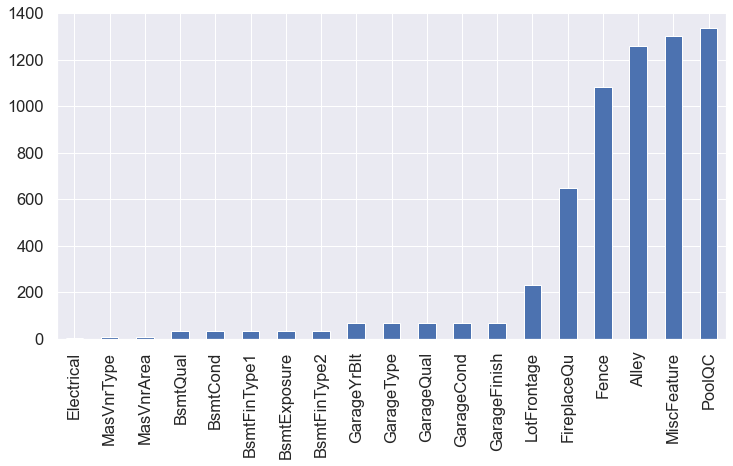

In [46]:
missing.plot.bar(figsize = (12,6))

# PoolQC, MiscFeature, Alley 순으로 많음

### 비대칭도 확인
- numeric 변수에만 해당

In [48]:
for col in numerical_features:
    print('{:15}'.format(col),
          'Skewness : {:05.2f}'.format(df_train[col].skew()),
         '  ', 
         'Kurtosis : {:06.2f}'.format(df_train[col].kurt()),)
    

Id              Skewness : 00.00    Kurtosis : -01.19
MSSubClass      Skewness : 01.37    Kurtosis : 001.49
LotFrontage     Skewness : 01.59    Kurtosis : 013.04
LotArea         Skewness : 07.78    Kurtosis : 123.55
OverallQual     Skewness : 00.16    Kurtosis : -00.05
OverallCond     Skewness : 00.74    Kurtosis : 001.23
YearBuilt       Skewness : -0.58    Kurtosis : -00.60
YearRemodAdd    Skewness : -0.52    Kurtosis : -01.27
MasVnrArea      Skewness : 02.69    Kurtosis : 011.04
BsmtFinSF1      Skewness : 00.65    Kurtosis : -00.50
BsmtFinSF2      Skewness : 04.86    Kurtosis : 026.86
BsmtUnfSF       Skewness : 00.87    Kurtosis : 000.29
TotalBsmtSF     Skewness : 00.29    Kurtosis : 001.17
1stFlrSF        Skewness : 00.66    Kurtosis : 000.02
2ndFlrSF        Skewness : 00.77    Kurtosis : -00.80
LowQualFinSF    Skewness : 12.74    Kurtosis : 170.50
GrLivArea       Skewness : 00.66    Kurtosis : 000.54
BsmtFullBath    Skewness : 00.56    Kurtosis : -00.96
BsmtHalfBath    Skewness : 0

## 2. EDA

Numerical Feature부터 살펴보기  

수치형 데이터들을 알아보기 위해 4가지 plot을 그린다
- Correlation Heat map
- Zoomed Heat map
- Pair Plot
- Scatter Plot

### Correlation Heat Map
- heat map은 seaborn 덕분에 직관적으로 이해가 가능해 변수간 상관관계에 대해서 쉽게 알 수 있음.  
- 또한 변수 간 다중 공선성을 감지하는데 유용하다

** 다중공선성(MultiColarisity) : 회귀분석에서 독립변수들의 간의 상관관계가 높으면 안된다는 조건을 위배하는 것


In [49]:
corr_data = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

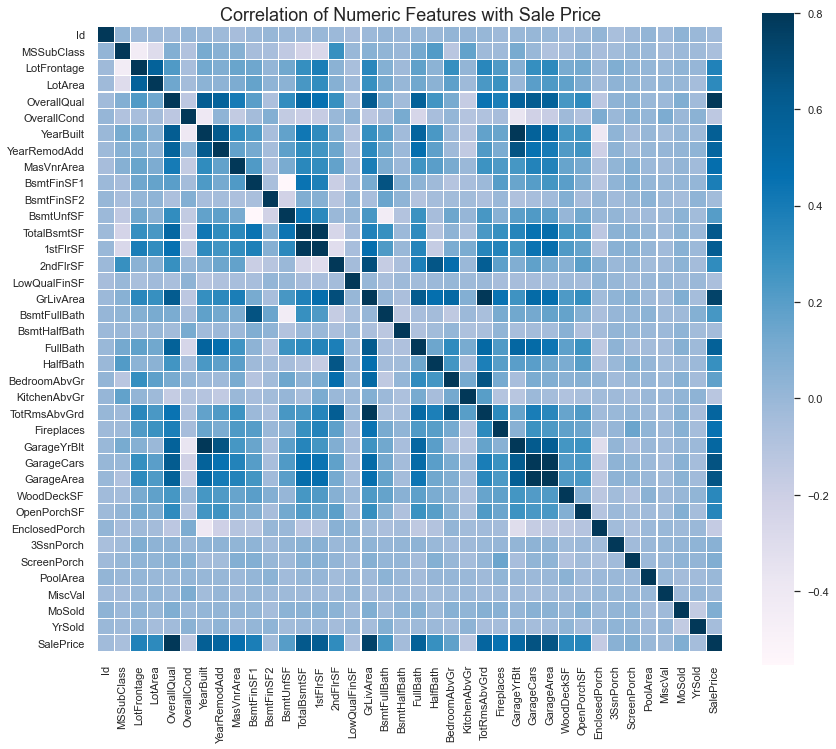

In [50]:
colormap = plt.cm.PuBu
sns.set(font_scale = 1.0)
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price', y= 1, size=18)
sns.heatmap(corr_data.corr(), square = True, linewidths = 0.1, 
            cmap = colormap, linecolor = 'white', vmax = 0.8)

대각선을 제외하고 가장 진한 파란색을 띄는 박스들을 찾는다  
1. TotalBsmtSF와 1stFlrSF
2. Garage와 관련한 변수
3. TotRmsAbvGrd와 GrLivArea  

또한 **OverallQual**과 **GrLivArea**는 타겟 피처인 **SalePrice**와도 큰 연관성을 보임을 알 수 있다.

### Zoomed Heat Map
- 나머지 변수와의 상관관계를 자세히 알아보기 위해 사용

In [51]:
k = 11
cols = corr_data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
# Target Feature와 가장 관련있는 11개의 변수

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot:>

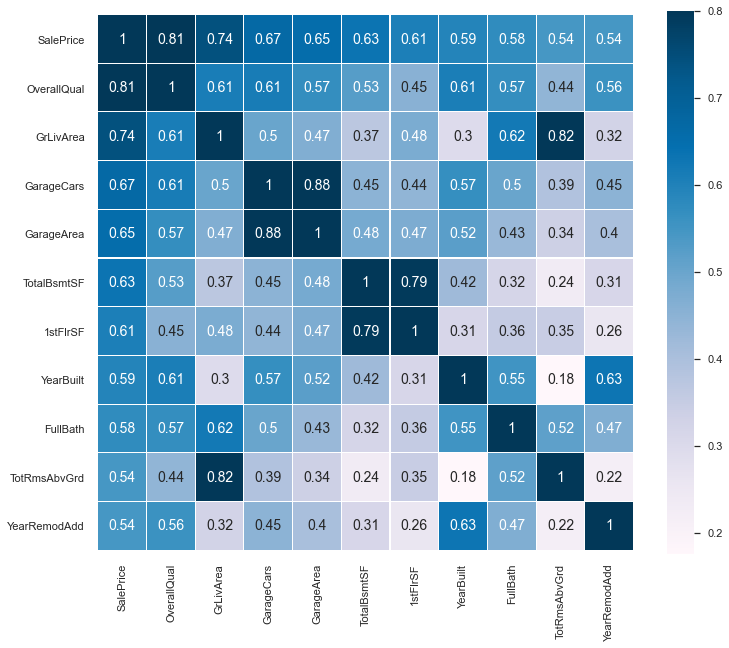

In [53]:
cm = np.corrcoef(df_train[cols].values.T)
f,ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths = 0.1, square=True, annot = True, cmap=colormap,
           linecolor = 'white', xticklabels= cols.values, annot_kws = {'size':14},
           yticklabels = cols.values)